In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [49]:
final_df = pd.read_csv('final_df.csv')

# Modeling

In [50]:
# Assign the data to independent and dependent variables
X = final_df.drop(['TARGET'],axis=1)
y = final_df['TARGET']

In [51]:
# Split the data into training and testing sets and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [52]:
# Check the shape of the datasets
X_train.shape,X_test.shape

((215257, 259), (92254, 259))

In [53]:
y_train.value_counts()

0.0    197880
1.0     17377
Name: TARGET, dtype: int64

In [54]:
y_test.value_counts()

0.0    84806
1.0     7448
Name: TARGET, dtype: int64

### Bagging Method

In [55]:
# Create the BaggingClassifier object
rf = RandomForestClassifier()
# Create the pipeline object
pipe = Pipeline(steps=[('rf',rf)])
params = {'rf__n_estimators':np.arange(100,200,100),'rf__max_depth':np.arange(2,30,6),'rf__criterion':['gini', 'entropy']}
#
grid = GridSearchCV(pipe,params,cv=3,scoring= 'roc_auc',verbose = 3,n_jobs=-1) #n_jobs=-1 means it will use all the available cores in the computer
grid.fit(X_train,y_train) #verbose=1 to show the progress of the GridSearchCV object

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': array([ 2,  8, 14, 20, 26]),
                         'rf__n_estimators': array([100])},
             scoring='roc_auc', verbose=3)

In [56]:
best_est = grid.best_estimator_
best_est

Pipeline(steps=[('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=14))])

In [57]:
pipe.set_params(rf__criterion='entropy',rf__n_estimators=100,rf__max_depth=14)

Pipeline(steps=[('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=14))])

In [58]:
pipe.fit(X_train,y_train)
pipe.score(X_train,y_train)# rbose=1 to show the progress of the GridSearchCV object

0.9226738270996995

In [60]:
y_pred = pipe.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84806
         1.0       0.66      0.01      0.01      7448

    accuracy                           0.92     92254
   macro avg       0.79      0.50      0.49     92254
weighted avg       0.90      0.92      0.88     92254



In [62]:
import joblib

In [63]:
filename = 'RandomForest_model.sav'
joblib.dump(pipe, filename)

['RandomForest_model.sav']

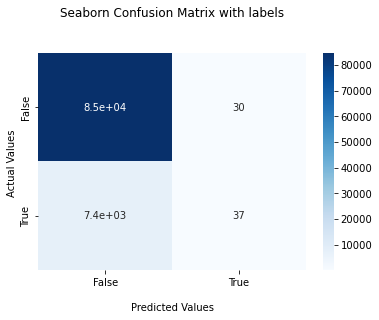

In [23]:
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Imbalanced Problem

## Resampling to combat with imbalanced distribution of target column

In [66]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpip
from imblearn.under_sampling import RandomUnderSampler

In [67]:
# define pipeline
steps = [('over', SMOTE()), ('rf', RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=14))]
pipeline = imbpip(steps=steps)

In [68]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('over', SMOTE()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=14))])

In [69]:
filename = 'RandomForest_model_smote.sav'
joblib.dump(pipeline, filename)

['RandomForest_model_smote.sav']

In [15]:
y_pred = pipeline.predict(X_test)

In [16]:
cf_matrix = confusion_matrix(y_pred,y_test)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     84806
         1.0       0.22      0.05      0.08      7448

    accuracy                           0.91     92254
   macro avg       0.57      0.52      0.51     92254
weighted avg       0.87      0.91      0.88     92254



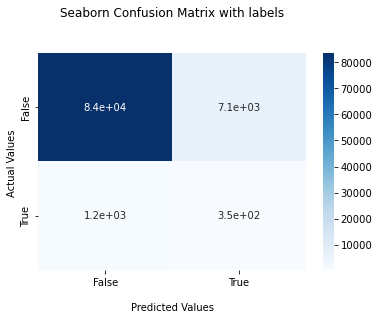

In [18]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [75]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('rf', RandomForestClassifier(criterion='entropy', max_depth=14))]
pipeline = imbpip(steps=steps)

In [76]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=14))])

In [77]:
filename = 'RandomForest_model_smote_under.sav'
joblib.dump(pipeline, filename)

['RandomForest_model_smote_under.sav']

In [25]:
y_pred = pipeline.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     84806
         1.0       0.22      0.34      0.27      7448

    accuracy                           0.85     92254
   macro avg       0.58      0.62      0.59     92254
weighted avg       0.88      0.85      0.86     92254



In [27]:
cf_matrix = confusion_matrix(y_test,y_pred)

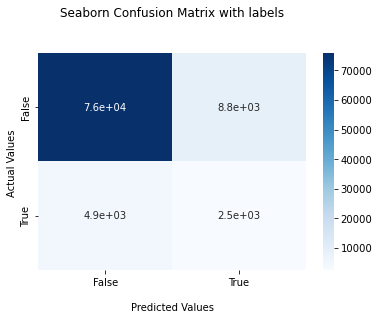

In [28]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()